# Analysis of Lake Water Quality Measurements of Time

## Parse Data

In [2]:
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/1Y_7_AertX2dd86mXmVtc5ju-sbccSAGZYByXZrDT9sw/export?gid=0&format=csv'

data = pd.read_csv(url)

In [3]:
data.head(20)

,Year,Lake,Class Hour,Temperature (°C),Conductivity (μS),pH,Alkalinity (ppm),Dissolved Oxygen (ppm),Copper (mg/L),Iron (mg/L),Total Hardness (ppm),Nitrate (mg/L),Nitrite (mg/L),Total Chlorine (ppm),Phosphate (ppm),Turbidity (NTUs)
0,2020,Lake Michigan,2nd,19.5,0.25,6.5,80,4.0,0.10,0,120,0,0,0.1,0.1,NaN
1,2021,Lake Michigan,2nd,16.9,0.32,7.0,120,8.5,0.10,0,180,0,0,0.0,0.2,NaN
2,2021,Lake Michigan,3rd,18.0,0.32,7.0,120,8.5,0.10,0,120,0,0,0.1,0.2,NaN
3,2022,Lake Michigan,3rd,22.8,0.00,7.5,120,8.5,0.00,0,120,0,0,0.1,NaN,13.0
4,2022,Lake Michigan,6th,23.9,0.33,7.5,120,8.5,0.00,0,50,0,0,0.0,NaN,10.0
5,2023,Lake Michigan,2nd,21.4,0.30,7.0,240,7.0,0.00,0,120,0,0,0.3,0.0,6.0
6,2023,Lake Michigan,6th,22.7,0.27,7.5,240,10.0,0.00,0,120,0,0,0.1,0.0,6.0
7,2020,North Lake,2nd,17.9,0.50,6.5,120,6.0,0.10,0,120,0,0,0.0,0.1,NaN
8,2021,North Lake,2nd,17.6,0.46,8.0,180,10.0,0.10,0,250,0,0,0.1,0.2,NaN
9,2021,North Lake,3rd,19.0,0.45,7.5,180,10.0,0.10,0,180,0,0,0.1,0.2,NaN


## Visualize Data

In [5]:
lakes = ['Lake Michigan', 'North Lake']

columns = data.columns[3:]

for c in columns:

    for l in lakes:
        df = data[data['Lake'] == l]
        plt.scatter(df['Year'], df[c], label=l)

    plt.xlabel('Year')
    plt.ylabel(c)
    plt.legend()
    plt.show()

NameError: name 'plt' is not defined

In [ ]:
print(columns)

Index(['Class Hour', 'Temperature (°C)', 'Conductivity (μS)', 'pH',
       'Alkalinity (ppm)', 'Dissolved Oxygen (ppm)', 'Copper (mg/L)',
       'Iron (mg/L)', 'Total Hardness (ppm)', 'Nitrate (mg/L)',
       'Nitrite (mg/L)', 'Total Chlorine (ppm)', 'Phosphate (ppm)',
       'Turbidity (NTUs)'],
      dtype='object')


## Relationships:
* Positive correlation between conductivity and disolved oxygen
* Possible positive correlation between conductivity and alkalinity
* Linear regression

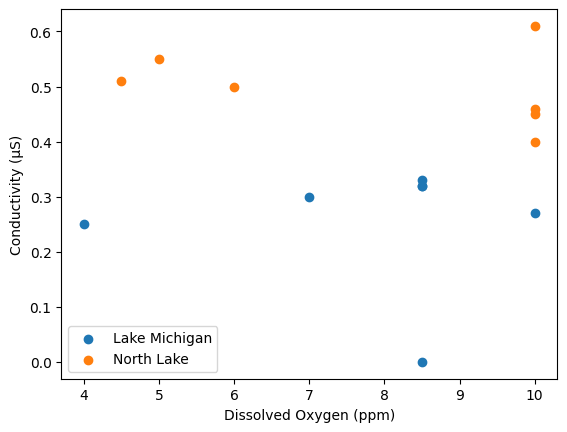

In [6]:
import matplotlib.pyplot as plt

lakes = ['Lake Michigan', 'North Lake']

for l in lakes:
    df = data[data['Lake'] == l]
    plt.scatter(df['Dissolved Oxygen (ppm)'], df['Conductivity (μS)'], label=l)

plt.xlabel('Dissolved Oxygen (ppm)')
plt.ylabel('Conductivity (μS)')
plt.legend()
plt.show()


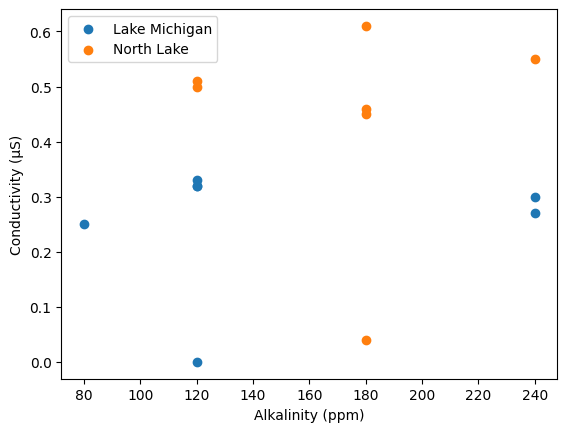

In [ ]:

lakes = ['Lake Michigan', 'North Lake']

for l in lakes:
    df = data[data['Lake'] == l]
    plt.scatter(df['Alkalinity (ppm)'], df['Conductivity (μS)'], label=l)

plt.xlabel('Alkalinity (ppm)')
plt.ylabel('Conductivity (μS)')
plt.legend()
plt.show()

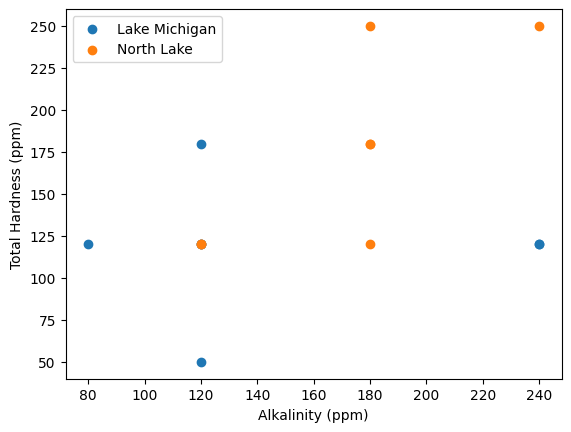

In [ ]:

lakes = ['Lake Michigan', 'North Lake']

for l in lakes:
    df = data[data['Lake'] == l]
    plt.scatter(df['Alkalinity (ppm)'], df['Total Hardness (ppm)'], label=l)

plt.xlabel('Alkalinity (ppm)')
plt.ylabel('Total Hardness (ppm)')
plt.legend()
plt.show()

In [ ]:
x = data['Alkalinity (ppm)'].values
y = data['Total Hardness (ppm)'].values

import scipy.stats as stats

b1_, b0_, r_value, p_value, std_err = stats.linregress(x, y)

# TODO: calculate mean, show mean on plots

# TODO: add uncertainty

print("slope = ",b1_,"ppm (hardness) / ppm (alkalinity)")
print("intercept =",b0_,"ppm (hardness)")

slope =  0.4293478260869565 ppm (hardness) / ppm (alkalinity)
intercept = 77.73291925465838 ppm (hardness)


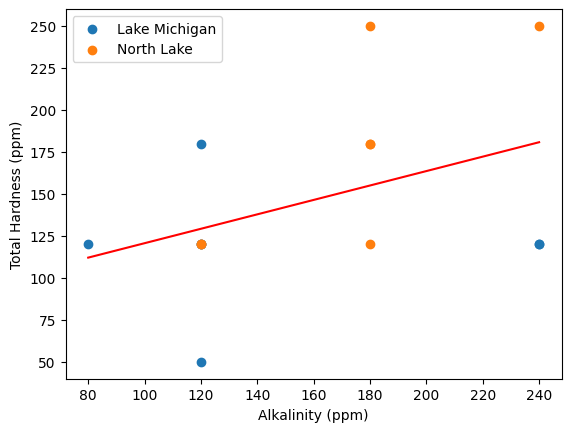

In [ ]:
lakes = ['Lake Michigan', 'North Lake']

for l in lakes:
    df = data[data['Lake'] == l]
    plt.scatter(df['Alkalinity (ppm)'], df['Total Hardness (ppm)'], label=l)

import numpy as np

x_plot = np.linspace(80, 240, 100)
y_plot = b1_*x_plot + b0_
plt.plot(x_plot, y_plot, color='red')

# TODO: add uncertainty to plot

plt.xlabel('Alkalinity (ppm)')
plt.ylabel('Total Hardness (ppm)')
plt.legend()
plt.show()

Regression notes: https://ndcbe.github.io/data-and-computing/notebooks/14/regression.html

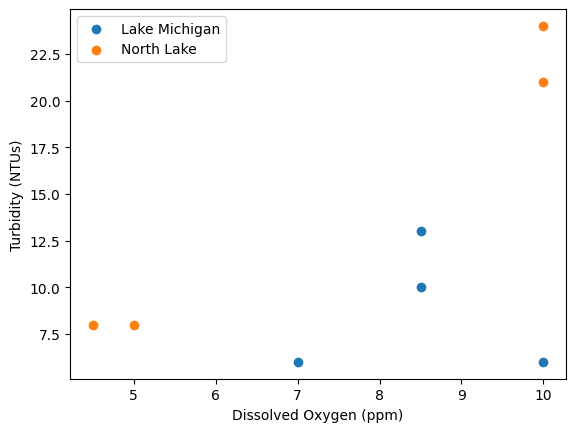

In [2]:
import matplotlib.pyplot as plt

lakes = ['Lake Michigan', 'North Lake']

for l in lakes:
    df = data[data['Lake'] == l]
    plt.scatter(df['Dissolved Oxygen (ppm)'], df['Turbidity (NTUs)'], label=l)

plt.xlabel('Dissolved Oxygen (ppm)')
plt.ylabel('Turbidity (NTUs)')
plt.legend()
plt.show()
